In [17]:
from __future__ import print_function
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "neural_nets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
# install pydot from conda 
# !conda install -c anaconda pydot
import pydot

In [18]:
import tensorflow as tf
#tf.enable_eager_execution()
print(tf.matmul([[1., 2.],[3., 4.]], [[1., 2.],[3., 4.]]))

tf.Tensor(
[[ 7. 10.]
 [15. 22.]], shape=(2, 2), dtype=float32)


In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


**Perceptrons**

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target ==0).astype(np.int) # Iris setosa

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [32]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__, keras.__version__)

2.1.0 2.2.4-tf


In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [34]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Fashion set is already split into train and test set. We split validation set seperatly from TrainingSet

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=5000)

#scale input features from 0-255 to <0, 1>

    
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#y_train

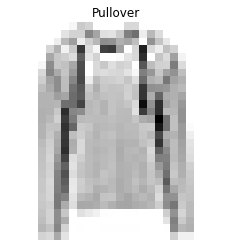

In [37]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title(class_names[y_train[0]])
plt.show()

In [13]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

Saving figure fashion_mnist_plot


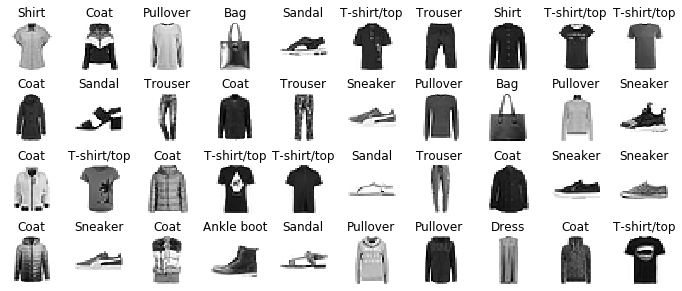

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
start_index = 42

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col 
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index+start_index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index+start_index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # only computes X.reshape(-1, 1)
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
# layers can be passed as list as argument to Sequential : 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


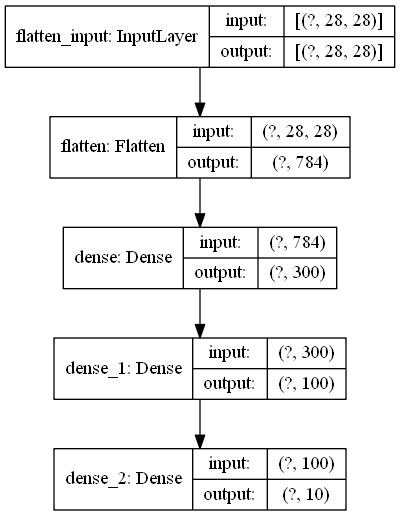

In [20]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer(hidden1.name) is hidden1

dense


True

In [22]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])
# sparse_categorical_crossentropy because we have sparse labels, classes are exclusive
# categorical_crossentropy will be needed when one target probabilty per class  ( like one=hot vectors)

In [40]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=[X_valid, y_valid])
# input features, target, number of epochs to train, default ==1
# we can also pass validation set 


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.7121 - accuracy: 0.7702 - val_loss: 0.5591 - val_accuracy: 0.8000
Epoch 2/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4869 - accuracy: 0.8310 - val_loss: 0.4823 - val_accuracy: 0.8276
Epoch 3/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4419 - accuracy: 0.8449 - val_loss: 0.4701 - val_accuracy: 0.8304
Epoch 4/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4132 - accuracy: 0.8549 - val_loss: 0.4243 - val_accuracy: 0.8504
Epoch 5/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3925 - accuracy: 0.8625 - val_loss: 0.4029 - val_accuracy: 0.8612
Epoch 6/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3763 - accuracy: 0.8673 - val_loss: 0.4044 - val_accuracy: 0.8586
Epoch 7/30
55000/55000 [==============================] -

KeyboardInterrupt: 

In [25]:
# if some classes are over / under represented - we can pass class_weight argument to fit()
# per-instance weights can be used when some labels are used by experts and other not

In [26]:
print(history.params)
print(history.epoch)

{'batch_size': 32, 'epochs': 30, 'steps': 1719, 'samples': 55000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

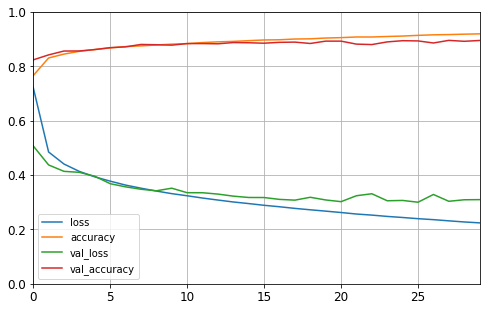

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertical range to [0-1]
plt.show()

In [29]:
# when performance not great, try to tune hyperparameters
# learning rate, number of layers, number of neurons per layer, activation functions, batch_size 


In [30]:
# evaluate on test set to estimate generalization error
model.evaluate(X_test, y_test, )

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3383 - accuracy: 0.8823


[0.33834927409887317, 0.8823]

In [31]:
# make predictions, using trained model
X_new = X_test[:20]
y_new = y_test[:20]
y_proba = model.predict(X_new)
y_pred = model.predict_classes(X_new)
print(len(y_pred))
np.array(class_names)[y_pred]

20


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag',
       'T-shirt/top'], dtype='<U11')

In [32]:
def plot_predictions(X, y, y_pred, class_names):
    all_to_plot = len(y_pred)
    n_cols = 10
    n_rows = all_to_plot // n_cols + 1
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    np_class_names = np.array(class_names)
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            if index >= all_to_plot:
                break
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index], cmap="binary", interpolation="nearest")
            plt.title(np_class_names[y_pred[index]])
            plt.axis('off')
            plt.title(class_names[y[index]], fontsize=12)

    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    save_fig('fashion_mnist_pred_plot', tight_layout=False)
    plt.show()

Saving figure fashion_mnist_pred_plot


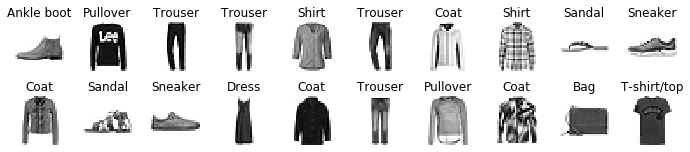

In [33]:
plot_predictions(X_new, y_new, y_pred, class_names)

**Regression MLP**

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test, verbose=2)

X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=2)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 84us/sample - loss: 1.8109 - val_loss: 3.9296
Epoch 2/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.7085 - val_loss: 0.6606
Epoch 3/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6371 - val_loss: 0.6023
Epoch 4/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6046 - val_loss: 0.5694
Epoch 5/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5779 - val_loss: 0.5408
Epoch 6/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5559 - val_loss: 0.5249
Epoch 7/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5370 - val_loss: 0.5087
Epoch 8/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5211 - val_loss: 0.5101
Epoch 9/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5073 - val_l

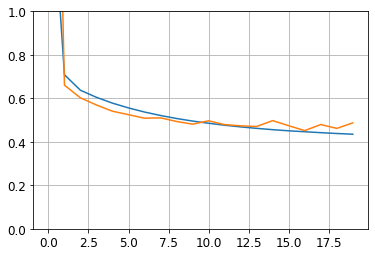

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Functional API**

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see paper) connects all or part of the inputs directly to the output layer.

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

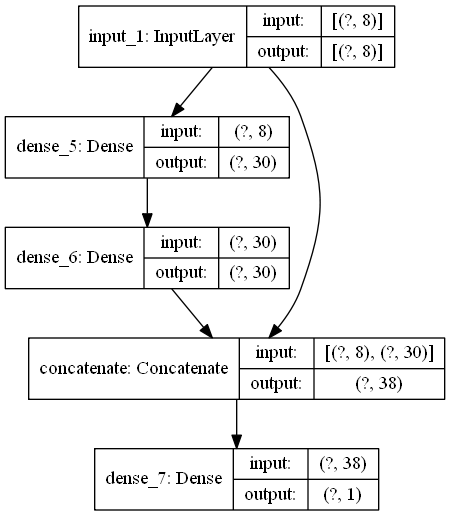

In [39]:
keras.utils.plot_model(model, "example_wide_and__deep_model.png", show_shapes=True)

In [40]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test, verbose=2)

X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=2)
mse_test

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 119us/sample - loss: 1.8972 - val_loss: 2.8182
Epoch 2/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.7034 - val_loss: 1.0101
Epoch 3/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6329 - val_loss: 0.7092
Epoch 4/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.5827 - val_loss: 0.6086
Epoch 5/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5500 - val_loss: 0.5213
Epoch 6/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.5224 - val_loss: 0.4815
Epoch 7/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4995 - val_loss: 0.4828
Epoch 8/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4826 - val_loss: 0.4633
Epoch 9/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4673 - val

0.39074267389238343

In [41]:
# many inputs case
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

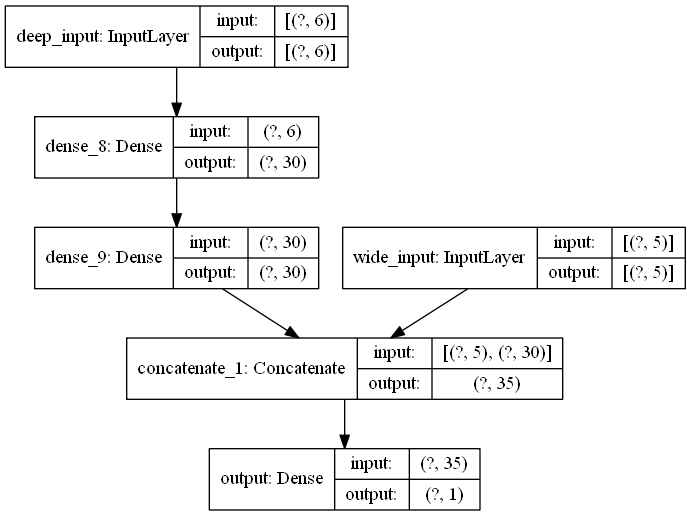

In [42]:
keras.utils.plot_model(model, "wide_and_deep_many_inputs_model.png", show_shapes=True)

In [43]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# we pass pair of matrices as input
# we send features 0-4 through wide path, features 2-7 through deep path
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test, verbose=2)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 136us/sample - loss: 1.8200 - val_loss: 1.9679
Epoch 2/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.8075 - val_loss: 0.8335
Epoch 3/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6768 - val_loss: 0.6472
Epoch 4/20
11610/11610 [==============================] - 1s 103us/sample - loss: 0.6185 - val_loss: 0.5872
Epoch 5/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5799 - val_loss: 0.5414
Epoch 6/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.5497 - val_loss: 0.5157
Epoch 7/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5253 - val_loss: 0.4911
Epoch 8/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.5049 - val_loss: 0.4698
Epoch 9/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4881 - va

In [44]:
# many outputs case
# for example if we want locate and classify object in a picture -> mnay outputs
# many independent task based on the same data
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

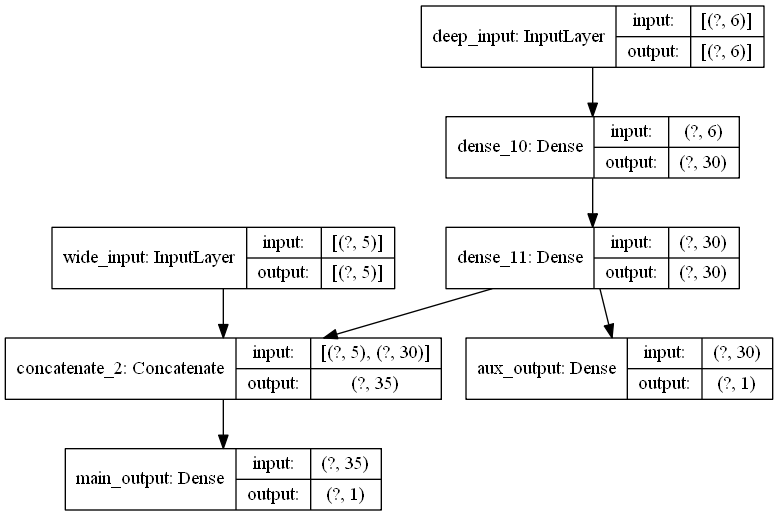

In [45]:
keras.utils.plot_model(model, "wide_and_deep_many_outputs_model.png", show_shapes=True)

In [46]:
# each output should have own loass function
# posssible to set weights to these losses
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [47]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test], verbose=2)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 135us/sample - loss: 2.6046 - main_output_loss: 2.3744 - aux_output_loss: 4.6673 - val_loss: 5.3705 - val_main_output_loss: 5.4793 - val_aux_output_loss: 4.3688
Epoch 2/20
11610/11610 [==============================] - 1s 91us/sample - loss: 1.0991 - main_output_loss: 0.9000 - aux_output_loss: 2.8932 - val_loss: 1.7838 - val_main_output_loss: 1.4911 - val_aux_output_loss: 4.4117
Epoch 3/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.8681 - main_output_loss: 0.7386 - aux_output_loss: 2.0324 - val_loss: 1.1148 - val_main_output_loss: 0.7825 - val_aux_output_loss: 4.1023
Epoch 4/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.7708 - main_output_loss: 0.6695 - aux_output_loss: 1.6809 - val_loss: 0.9392 - val_main_output_loss: 0.6349 - val_aux_output_loss: 3.6758
Epoch 5/20
11610/11610 [==============================] - 1s 101us

**The subclassing API**

In [48]:
# Subclass Model clas, create layers in the constructor
# use call() to perform computations 

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [49]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test), verbose=2)
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 138us/sample - loss: 2.3199 - output_1_loss: 2.1742 - output_2_loss: 3.6232 - val_loss: 6.2792 - val_output_1_loss: 6.1395 - val_output_2_loss: 7.5077
Epoch 2/10
11610/11610 [==============================] - 1s 96us/sample - loss: 1.0446 - output_1_loss: 0.9059 - output_2_loss: 2.2949 - val_loss: 1.9048 - val_output_1_loss: 1.5907 - val_output_2_loss: 4.7240
Epoch 3/10
11610/11610 [==============================] - 1s 94us/sample - loss: 0.8372 - output_1_loss: 0.7322 - output_2_loss: 1.7807 - val_loss: 1.1488 - val_output_1_loss: 0.8493 - val_output_2_loss: 3.8404
Epoch 4/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.7478 - output_1_loss: 0.6629 - output_2_loss: 1.5099 - val_loss: 0.9208 - val_output_1_loss: 0.6545 - val_output_2_loss: 3.3155
Epoch 5/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.6948 - output_1_loss: 0

**Saving and Restoring**

Keras uses hdf5 format to save model architecture, values for every layer hyperparameter
It also saves optimzer


In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test, verbose=2)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 84us/sample - loss: 1.5215 - val_loss: 1.2073
Epoch 2/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.7131 - val_loss: 0.6833
Epoch 3/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6431 - val_loss: 0.6283
Epoch 4/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5986 - val_loss: 0.5860
Epoch 5/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5637 - val_loss: 0.5754
Epoch 6/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5365 - val_loss: 0.5182
Epoch 7/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5131 - val_loss: 0.4986
Epoch 8/10
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4946 - val_loss: 0.4710
Epoch 9/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4785 - val_l

In [51]:
model.save("my_keras_model.h5")

In [52]:
# to load model back:
model = keras.models.load_model("my_keras_model.h5")
# works for sequentional & FunctionalApi
# doesn't work for subclassing

model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")


**Using Callbacks during Training**

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# by default at the end of each epoch
# save_best_only -> will only save model when it's performance on validation set is best so far
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# pass callbacks as argument
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test, verbose=2)


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 106us/sample - loss: 1.3472 - val_loss: 0.8959
Epoch 2/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.7463 - val_loss: 0.7329
Epoch 3/10
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6981 - val_loss: 0.6685
Epoch 4/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6585 - val_loss: 0.6305
Epoch 5/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6225 - val_loss: 0.6157
Epoch 6/10
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5916 - val_loss: 0.5639
Epoch 7/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5621 - val_loss: 0.5366
Epoch 8/10
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5363 - val_loss: 0.5117
Epoch 9/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5117 - val_

In [54]:
# can also early stopping
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# save_best_only -> will only save model when it's performance on validation set is best so far
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# Early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# pass callbacks as argument
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test, verbose=2)


Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 95us/sample - loss: 2.2726 - val_loss: 2.1836
Epoch 2/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.9891 - val_loss: 0.7687
Epoch 3/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6758 - val_loss: 0.6137
Epoch 4/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6140 - val_loss: 0.5810
Epoch 5/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5832 - val_loss: 0.5556
Epoch 6/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5585 - val_loss: 0.5411
Epoch 7/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5374 - val_loss: 0.5159
Epoch 8/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5195 - val_loss: 0.5007
Epoch 9/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.503

In [55]:
# Custom callbacks are possible

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# can implement 
# on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])


Train on 11610 samples, validate on 3870 samples
10688/11610 [==========================>...] - ETA: 0s - loss: 0.3954
val/train: 1.19
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4006 - val_loss: 0.4770


**TensorBoard**

In [56]:
import os
import time

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# run_logdir = get_run_logdir()

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

Tensorboard blank page errors fix:

https://github.com/tensorflow/tensorboard/issues/3117

Registry :
Computer\HKEY_CLASSES_ROOT\.js

set to

"application/javascript"


In [58]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])


Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 124us/sample - loss: 1.9684 - val_loss: 4.9377
Epoch 2/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.7967 - val_loss: 1.2206
Epoch 3/30
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6689 - val_loss: 0.6567
Epoch 4/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6209 - val_loss: 0.5763
Epoch 5/30
11610/11610 [==============================] - 1s 82us/sample - loss: 0.5846 - val_loss: 0.5407
Epoch 6/30
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5535 - val_loss: 0.5115
Epoch 7/30
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5260 - val_loss: 0.4861
Epoch 8/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5016 - val_loss: 0.4629
Epoch 9/30
11610/11610 [==============================] - 1s 80us/sample - loss: 0.4802 - val_

In [59]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_04_10-00_23_17'

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))


In [62]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 9s 793us/sample - loss: 5.6407 - val_loss: 1.3204
Epoch 2/30
11610/11610 [==============================] - 8s 692us/sample - loss: 1.2705 - val_loss: 1.0759
Epoch 3/30
11610/11610 [==============================] - 9s 762us/sample - loss: 0.9338 - val_loss: 0.8364
Epoch 4/30
11610/11610 [==============================] - 9s 778us/sample - loss: 0.8684 - val_loss: 0.8695
Epoch 5/30
11610/11610 [==============================] - 9s 766us/sample - loss: 0.7826 - val_loss: 0.5866
Epoch 6/30
11610/11610 [==============================] - 8s 722us/sample - loss: 1.2216 - val_loss: 1.3165TA: 0s - loss:
Epoch 7/30
11610/11610 [==============================] - 8s 723us/sample - loss: 1.3420 - val_loss: 1.3163
Epoch 8/30
11610/11610 [==============================] - 8s 731us/sample - loss: 1.3427 - val_loss: 1.3165
Epoch 9/30
11610/11610 [==============================] - 8s 729us/sample

**Hyperparameter Tuning**

Use GridSearchCV / RandomizedSearchCV to explore hyperparameters space.
We need to wrap our Keras models in objects that implement regular scikit-learn regressors interfaces.


In [73]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [74]:
# KerasRegressor is thin wrapper around Keras model. It will use default hyperparameters defined in build_model()
# we can use it later like regular scikit-learn regressor: train using fit(), evaluate using score()
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [75]:
keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=[X_valid, y_valid],
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 105us/sample - loss: 1.5300 - val_loss: 34.7157
Epoch 2/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.9886 - val_loss: 2.2164
Epoch 3/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.6400 - val_loss: 0.7096
Epoch 4/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5611 - val_loss: 0.4938
Epoch 5/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5081 - val_loss: 0.4580
Epoch 6/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4716 - val_loss: 0.4290
Epoch 7/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4473 - val_loss: 0.4099
Epoch 8/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4338 - val_loss: 0.3965
Epoch 9/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4

Epoch 76/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3443 - val_loss: 0.3280
Epoch 77/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3436 - val_loss: 0.3595
Epoch 78/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3430 - val_loss: 0.3260
Epoch 79/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3429 - val_loss: 0.4136
Epoch 80/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3425 - val_loss: 0.3354
Epoch 81/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3402 - val_loss: 0.3746
Epoch 82/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3426 - val_loss: 0.3349
Epoch 83/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3406 - val_loss: 0.3512
Epoch 84/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3408 - val_loss: 0.3528
Epoch 85/100
11610/

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# "learning_rate": reciprocal(3e-4, 3e-2)
r = reciprocal.rvs(3e-4, 3e-2, size=100)


param_distribs = {
    "n_hidden": (0, 1, 2, 3),
    "n_neurons": list(np.arange(1, 100)),
    "learning_rate": r
}

run_logdir3 = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir3)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10), tensorboard_cb])



In [23]:
#from __future__ import print_function
import numpy as np

from hyperopt import Trials, STATUS_OK, tpe
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.layers.core import Dense, Dropout, Activation 
from tensorflow.keras.models import Sequential
#from tensorflow.keras.utils import np_utils

from tensorflow.keras.utils import to_categorical

from hyperas import optim
from hyperas.distributions import choice, uniform

import time

def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    nb_classes = 10
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    return x_train, y_train, x_test, y_test


def create_model(x_train, y_train, x_test, y_test):
    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    """
    root_logdir = os.path.join(os.curdir, "my_logs")
    def get_run_logdir():
        run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
        return os.path.join(root_logdir, run_id)
    
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense(100))

        # We can also choose between complete sets of layers

        model.add({{choice([Dropout(0.5), Activation('linear')])}})
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    adam = keras.optimizers.Adam(lr={{choice([1e-3, 3e-3, 1e-2, 3e-2, 1e-1])}})
    rmsprop = keras.optimizers.RMSprop(lr={{choice([1e-3, 3e-3, 1e-2, 3e-2, 1e-1])}})
    sgd = keras.optimizers.SGD(lr={{choice([1e-3, 3e-3, 1e-2, 3e-2, 1e-1])}})

    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = adam
    elif choiceval == 'rmsprop':
        optim = rmsprop
    else:
        optim = sgd
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
                  optimizer=optim)

    run_logdir = get_run_logdir()
    
    run_id = os.path.join(root_logdir, "model@{}".format(int(time.time())))
    
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    tensorboard = keras.callbacks.TensorBoard(log_dir=run_id)
    
    result = model.fit(x_train, y_train,
            #batch_size={{choice([64, 128])}},
            batch_size=64,
            epochs=50,
            verbose=2,
            validation_split=0.1,
            callbacks=[keras.callbacks.EarlyStopping(patience=5), tensorboard])
    #get the highest validation accuracy of the training epochs
    validation_acc = np.amax(result.history['val_accuracy']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}


In [33]:
time.time()

NameError: name 'time' is not defined

In [24]:
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),
                                          notebook_name='Ch10-NeuralNets')

X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    import sys
except:
    pass

try:
    import sklearn
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import os
except:
    pass

try:
    import matplotlib as mpl
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import graphviz
except:
    pass

try:
    from graphviz import Source
except:
    pass

try:
    from sklearn.tree import export_graphviz
except:
    pass

try:
    import pydot
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from sklearn.datasets import load_iris
except:
    pass

try:
    from sklearn.linear_model import Perceptron
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from tensorflow import keras
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    import pandas as pd
exc

54000/54000 - 23s - loss: 0.2081 - accuracy: 0.9400 - val_loss: 0.1589 - val_accuracy: 0.9602                                                                                                            

Epoch 24/50                                                                                                                                                                                              
54000/54000 - 22s - loss: 0.2033 - accuracy: 0.9414 - val_loss: 0.1556 - val_accuracy: 0.9610                                                                                                            

Epoch 25/50                                                                                                                                                                                              
54000/54000 - 24s - loss: 0.1990 - accuracy: 0.9432 - val_loss: 0.1523 - val_accuracy: 0.9627                                                                                                 

Epoch 10/50                                                                                                                                                                                              
54000/54000 - 24s - loss: 0.9687 - accuracy: 0.7011 - val_loss: 0.3426 - val_accuracy: 0.9205                                                                                                            

Epoch 11/50                                                                                                                                                                                              
54000/54000 - 27s - loss: 0.9651 - accuracy: 0.7020 - val_loss: 0.3195 - val_accuracy: 0.9238                                                                                                            

Epoch 12/50                                                                                                                                                                                   

Epoch 27/50                                                                                                                                                                                              
54000/54000 - 19s - loss: 0.9195 - accuracy: 0.6920 - val_loss: 0.5505 - val_accuracy: 0.8362                                                                                                            

Epoch 28/50                                                                                                                                                                                              
54000/54000 - 18s - loss: 0.9012 - accuracy: 0.6979 - val_loss: 0.5354 - val_accuracy: 0.8357                                                                                                            

Epoch 29/50                                                                                                                                                                                   

Epoch 5/50                                                                                                                                                                                               
54000/54000 - 20s - loss: 2.3772 - accuracy: 0.1031 - val_loss: 2.3121 - val_accuracy: 0.1115                                                                                                            

Epoch 6/50                                                                                                                                                                                               
54000/54000 - 20s - loss: 2.3120 - accuracy: 0.1036 - val_loss: 2.3111 - val_accuracy: 0.1052                                                                                                            

Epoch 7/50                                                                                                                                                                                    

In [122]:
%load_ext tensorboard

import time

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split

import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.layers.core import Dense, Dropout, Activation 
from tensorflow.keras.models import Sequential
#from tensorflow.keras.utils import np_utils

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.0001)
def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    nb_classes = 10
    y_train = to_categorical(y_train, nb_classes)
    y_test = to_categorical(y_test, nb_classes)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [123]:
X_train, y_train, X_val, y_val, X_test, y_test = data()
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((48000, 784),
 (48000, 10),
 (12000, 784),
 (12000, 10),
 (10000, 784),
 (10000, 10))

In [124]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([128, 256, 512, 1024]))
#HP_NUM_UNITS_2 = hp.HParam('num_units_2', hp.Discrete([256, 512, 1024]))
#HP_NUM_UNITS_3 = hp.HParam('num_units_3', hp.Discrete([256, 512, 1024]))

HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.8))
HP_LEARNING_RATE = hp.HParam('lr', hp.Discrete([1e-3, 3e-3, 1e-2]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete( ['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'
METRIC_VALIDATION_ACCURACY = 'val_accuracy'

logdir = "my_logs/hparam_tuning"
with tf.summary.create_file_writer(logdir).as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy'),
                 hp.Metric(METRIC_VALIDATION_ACCURACY, display_name='Validation Accuracy')],
    )


In [125]:
def train_test_model(hparams, logdir):
    model = keras.models.Sequential([
        keras.layers.Dense(hparams[HP_NUM_UNITS], input_shape=(784,), activation="relu"),
        keras.layers.Dropout(hparams[HP_DROPOUT]),
        keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
        keras.layers.Dropout(hparams[HP_DROPOUT]),
        keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
        keras.layers.Dropout(hparams[HP_DROPOUT]),
        keras.layers.Dense(10, activation=tf.nn.softmax),
      ])
  
    model.compile(
          optimizer=hparams[HP_OPTIMIZER],
          loss='categorical_crossentropy', #'sparse_categorical_crossentropy',
          metrics=['accuracy'],
      )
    tensorboard_cb = keras.callbacks.TensorBoard(logdir)
    
    result = model.fit(X_train, y_train, epochs=20, batch_size=256,
                validation_data=(X_val, y_val),
                callbacks=[
                reduce_lr
                #,tensorboard_cb
                #,tf.keras.callbacks.TensorBoard(logdir)  # log metrics
                #,hp.KerasCallback(logdir, hparams)  # log hparams  
            ])
    validation_acc = np.amax(result.history['val_accuracy']) 
    _ , accuracy = model.evaluate(X_test, y_test, verbose=2)
    return validation_acc, accuracy

In [127]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        validation_acc, accuracy = train_test_model(hparams, run_dir)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
        tf.summary.scalar(METRIC_VALIDATION_ACCURACY, validation_acc, step=1)


In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

logdir = os.path.join("my_logs", "hparam_tuning")

session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in np.linspace(HP_DROPOUT.domain.min_value ,HP_DROPOUT.domain.max_value, 8):
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_OPTIMIZER: optimizer,
                }
            time_id = time.strftime("%Y_%m_%d-%H_%M_%S")
            run_name = f"run-{session_num}-{time_id}"
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            #run('logs/hparam_tuning/' + run_name, hparams)
            #run(logdir + "/" + run_name, hparams)
            run(os.path.join(logdir, run_name), hparams)
            session_num += 1

--- Starting trial: run-0-2020_04_12-03_28_34
{'num_units': 128, 'dropout': 0.1, 'optimizer': 'adam'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 206us/sample - loss: 0.5158 - accuracy: 0.8431 - val_loss: 0.1990 - val_accuracy: 0.9395
Epoch 2/20
48000/48000 [==============================] - 7s 141us/sample - loss: 0.1939 - accuracy: 0.9421 - val_loss: 0.1288 - val_accuracy: 0.9606
Epoch 3/20
48000/48000 [==============================] - 7s 137us/sample - loss: 0.1377 - accuracy: 0.9587 - val_loss: 0.1019 - val_accuracy: 0.9675
Epoch 4/20
48000/48000 [==============================] - 7s 145us/sample - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 5/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0909 - accuracy: 0.9718 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 6/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0801 - accura

Epoch 12/20
48000/48000 [==============================] - 7s 141us/sample - loss: 0.0596 - accuracy: 0.9811 - val_loss: 0.0759 - val_accuracy: 0.9787
Epoch 13/20
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0789 - val_accuracy: 0.9789
Epoch 14/20
48000/48000 [==============================] - 8s 158us/sample - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0777 - val_accuracy: 0.9795
Epoch 15/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0761 - val_accuracy: 0.9792
Epoch 16/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.0498 - accuracy: 0.9838 - val_loss: 0.0773 - val_accuracy: 0.9788
Epoch 17/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.0797 - val_accuracy: 0.9797
Epoch 18/20
48000/48000 [==============================] - 7s 151us/sample - loss: 0.0351 - ac

48000/48000 [==============================] - 7s 141us/sample - loss: 1.7537 - accuracy: 0.4522 - val_loss: 1.2309 - val_accuracy: 0.7369
Epoch 3/20
48000/48000 [==============================] - 7s 141us/sample - loss: 1.2890 - accuracy: 0.5847 - val_loss: 0.8150 - val_accuracy: 0.7937
Epoch 4/20
48000/48000 [==============================] - 6s 135us/sample - loss: 1.0228 - accuracy: 0.6636 - val_loss: 0.6421 - val_accuracy: 0.8281
Epoch 5/20
48000/48000 [==============================] - 7s 145us/sample - loss: 0.8768 - accuracy: 0.7108 - val_loss: 0.5515 - val_accuracy: 0.8475
Epoch 6/20
48000/48000 [==============================] - 7s 153us/sample - loss: 0.7794 - accuracy: 0.7470 - val_loss: 0.4969 - val_accuracy: 0.8585
Epoch 7/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.7155 - accuracy: 0.7697 - val_loss: 0.4509 - val_accuracy: 0.8714
Epoch 8/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.6709 - accuracy: 0.7875 - v

Epoch 14/20
48000/48000 [==============================] - 6s 132us/sample - loss: 0.5996 - accuracy: 0.8161 - val_loss: 0.3480 - val_accuracy: 0.9000
Epoch 15/20
48000/48000 [==============================] - 7s 147us/sample - loss: 0.5724 - accuracy: 0.8241 - val_loss: 0.3361 - val_accuracy: 0.9039
Epoch 16/20
48000/48000 [==============================] - 6s 130us/sample - loss: 0.5527 - accuracy: 0.8307 - val_loss: 0.3237 - val_accuracy: 0.9071
Epoch 17/20
48000/48000 [==============================] - 6s 119us/sample - loss: 0.5318 - accuracy: 0.8392 - val_loss: 0.3142 - val_accuracy: 0.9106
Epoch 18/20
48000/48000 [==============================] - 7s 153us/sample - loss: 0.5219 - accuracy: 0.8429 - val_loss: 0.3043 - val_accuracy: 0.9137
Epoch 19/20
48000/48000 [==============================] - 7s 149us/sample - loss: 0.5054 - accuracy: 0.8481 - val_loss: 0.2964 - val_accuracy: 0.9153
Epoch 20/20
48000/48000 [==============================] - 7s 139us/sample - loss: 0.4898 - ac

48000/48000 [==============================] - 6s 123us/sample - loss: 1.4485 - accuracy: 0.4956 - val_loss: 0.4565 - val_accuracy: 0.8887
Epoch 2/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.6449 - accuracy: 0.8073 - val_loss: 0.2851 - val_accuracy: 0.9244
Epoch 3/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.4925 - accuracy: 0.8614 - val_loss: 0.2379 - val_accuracy: 0.9333
Epoch 4/20
48000/48000 [==============================] - 8s 168us/sample - loss: 0.4332 - accuracy: 0.8841 - val_loss: 0.2110 - val_accuracy: 0.9423
Epoch 5/20
48000/48000 [==============================] - 6s 132us/sample - loss: 0.3914 - accuracy: 0.8951 - val_loss: 0.1913 - val_accuracy: 0.9463
Epoch 6/20
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3598 - accuracy: 0.9054 - val_loss: 0.1840 - val_accuracy: 0.9502
Epoch 7/20
48000/48000 [==============================] - 7s 136us/sample - loss: 0.3382 - accuracy: 0.9116 - v

Epoch 12/20
48000/48000 [==============================] - 8s 159us/sample - loss: 0.5470 - accuracy: 0.8518 - val_loss: 0.2541 - val_accuracy: 0.9358
Epoch 13/20
48000/48000 [==============================] - 6s 132us/sample - loss: 0.5300 - accuracy: 0.8570 - val_loss: 0.2528 - val_accuracy: 0.9365
Epoch 14/20
48000/48000 [==============================] - 6s 134us/sample - loss: 0.5116 - accuracy: 0.8632 - val_loss: 0.2413 - val_accuracy: 0.9386
Epoch 15/20
48000/48000 [==============================] - 7s 143us/sample - loss: 0.5101 - accuracy: 0.8628 - val_loss: 0.2436 - val_accuracy: 0.9373
Epoch 16/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.4901 - accuracy: 0.8689 - val_loss: 0.2438 - val_accuracy: 0.9398
Epoch 17/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.4889 - accuracy: 0.8697 - val_loss: 0.2376 - val_accuracy: 0.9388
Epoch 18/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.4745 - ac

48000/48000 [==============================] - 6s 118us/sample - loss: 2.3097 - accuracy: 0.1199 - val_loss: 2.2956 - val_accuracy: 0.1507
Epoch 3/20
48000/48000 [==============================] - 5s 109us/sample - loss: 2.2954 - accuracy: 0.1230 - val_loss: 2.2882 - val_accuracy: 0.1103
Epoch 4/20
48000/48000 [==============================] - 6s 118us/sample - loss: 2.2777 - accuracy: 0.1312 - val_loss: 2.2740 - val_accuracy: 0.1608
Epoch 5/20
48000/48000 [==============================] - 7s 139us/sample - loss: 2.2477 - accuracy: 0.1481 - val_loss: 2.2496 - val_accuracy: 0.1860
Epoch 6/20
48000/48000 [==============================] - 8s 159us/sample - loss: 2.2125 - accuracy: 0.1627 - val_loss: 2.2157 - val_accuracy: 0.2113
Epoch 7/20
48000/48000 [==============================] - 7s 155us/sample - loss: 2.1773 - accuracy: 0.1782 - val_loss: 2.1869 - val_accuracy: 0.2528
Epoch 8/20
48000/48000 [==============================] - 6s 130us/sample - loss: 2.1490 - accuracy: 0.1889 - v

Epoch 14/20
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3061 - accuracy: 0.9107 - val_loss: 0.2523 - val_accuracy: 0.9267
Epoch 15/20
48000/48000 [==============================] - 5s 111us/sample - loss: 0.2975 - accuracy: 0.9124 - val_loss: 0.2453 - val_accuracy: 0.9283
Epoch 16/20
48000/48000 [==============================] - 5s 103us/sample - loss: 0.2900 - accuracy: 0.9146 - val_loss: 0.2394 - val_accuracy: 0.9308
Epoch 17/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.2817 - accuracy: 0.9181 - val_loss: 0.2330 - val_accuracy: 0.9309
Epoch 18/20
48000/48000 [==============================] - 4s 90us/sample - loss: 0.2742 - accuracy: 0.9204 - val_loss: 0.2262 - val_accuracy: 0.9338
Epoch 19/20
48000/48000 [==============================] - 5s 96us/sample - loss: 0.2668 - accuracy: 0.9204 - val_loss: 0.2218 - val_accuracy: 0.9350
Epoch 20/20
48000/48000 [==============================] - 5s 103us/sample - loss: 0.2610 - accura

48000/48000 [==============================] - 5s 105us/sample - loss: 0.1178 - accuracy: 0.9640 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 5/20
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.0817 - val_accuracy: 0.9774
Epoch 6/20
48000/48000 [==============================] - 5s 94us/sample - loss: 0.0874 - accuracy: 0.9725 - val_loss: 0.0887 - val_accuracy: 0.9735
Epoch 7/20
48000/48000 [==============================] - 5s 103us/sample - loss: 0.0751 - accuracy: 0.9769 - val_loss: 0.0765 - val_accuracy: 0.9777
Epoch 8/20
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0705 - accuracy: 0.9773 - val_loss: 0.0732 - val_accuracy: 0.9783
Epoch 9/20
48000/48000 [==============================] - 4s 92us/sample - loss: 0.0624 - accuracy: 0.9799 - val_loss: 0.0729 - val_accuracy: 0.9799
Epoch 10/20
48000/48000 [==============================] - 4s 78us/sample - loss: 0.0603 - accuracy: 0.9806 - val_

Epoch 16/20
48000/48000 [==============================] - 5s 96us/sample - loss: 0.0615 - accuracy: 0.9808 - val_loss: 0.0768 - val_accuracy: 0.9793
Epoch 17/20
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0768 - val_accuracy: 0.9797
Epoch 18/20
48000/48000 [==============================] - 5s 105us/sample - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0742 - val_accuracy: 0.9813
Epoch 19/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0741 - val_accuracy: 0.9818
Epoch 20/20
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0765 - val_accuracy: 0.9812
10000/10000 - 9s - loss: 0.0662 - accuracy: 0.9826
--- Starting trial: run-23-2020_04_12-04_18_21
{'num_units': 256, 'dropout': 0.4, 'optimizer': 'sgd'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [===================

48000/48000 [==============================] - 5s 109us/sample - loss: 0.9497 - accuracy: 0.6798 - val_loss: 0.5733 - val_accuracy: 0.8429
Epoch 7/20
48000/48000 [==============================] - 6s 128us/sample - loss: 0.8516 - accuracy: 0.7188 - val_loss: 0.5143 - val_accuracy: 0.8563
Epoch 8/20
48000/48000 [==============================] - 5s 99us/sample - loss: 0.7908 - accuracy: 0.7425 - val_loss: 0.4697 - val_accuracy: 0.8703
Epoch 9/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.7281 - accuracy: 0.7662 - val_loss: 0.4323 - val_accuracy: 0.8802
Epoch 10/20
48000/48000 [==============================] - 5s 111us/sample - loss: 0.6835 - accuracy: 0.7808 - val_loss: 0.4077 - val_accuracy: 0.8859
Epoch 11/20
48000/48000 [==============================] - 5s 101us/sample - loss: 0.6443 - accuracy: 0.7969 - val_loss: 0.3806 - val_accuracy: 0.8927
Epoch 12/20
48000/48000 [==============================] - 4s 76us/sample - loss: 0.6127 - accuracy: 0.8106 - 

Epoch 18/20
48000/48000 [==============================] - 6s 115us/sample - loss: 0.6291 - accuracy: 0.8058 - val_loss: 0.3527 - val_accuracy: 0.9014
Epoch 19/20
48000/48000 [==============================] - 4s 90us/sample - loss: 0.6082 - accuracy: 0.8131 - val_loss: 0.3426 - val_accuracy: 0.9033
Epoch 20/20
48000/48000 [==============================] - 5s 95us/sample - loss: 0.5861 - accuracy: 0.8194 - val_loss: 0.3310 - val_accuracy: 0.9065
10000/10000 - 9s - loss: 0.3160 - accuracy: 0.9114
--- Starting trial: run-28-2020_04_12-04_27_12
{'num_units': 256, 'dropout': 0.7000000000000001, 'optimizer': 'adam'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 108us/sample - loss: 1.4447 - accuracy: 0.4959 - val_loss: 0.4029 - val_accuracy: 0.9004
Epoch 2/20
48000/48000 [==============================] - 6s 124us/sample - loss: 0.6134 - accuracy: 0.8171 - val_loss: 0.2654 - val_accuracy: 0.9287
Epoch 3/20
48000/48000 [======

48000/48000 [==============================] - 5s 99us/sample - loss: 1.0070 - accuracy: 0.6086 - val_loss: 0.7489 - val_accuracy: 0.7466
Epoch 9/20
48000/48000 [==============================] - 6s 118us/sample - loss: 0.9623 - accuracy: 0.6291 - val_loss: 0.7088 - val_accuracy: 0.7457
Epoch 10/20
48000/48000 [==============================] - 5s 113us/sample - loss: 0.9282 - accuracy: 0.6509 - val_loss: 0.6547 - val_accuracy: 0.7667
Epoch 11/20
48000/48000 [==============================] - 5s 97us/sample - loss: 0.8906 - accuracy: 0.6643 - val_loss: 0.6171 - val_accuracy: 0.7696
Epoch 12/20
48000/48000 [==============================] - 5s 99us/sample - loss: 0.8540 - accuracy: 0.6777 - val_loss: 0.5954 - val_accuracy: 0.7696
Epoch 13/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.8323 - accuracy: 0.6886 - val_loss: 0.5892 - val_accuracy: 0.7653
Epoch 14/20
48000/48000 [==============================] - 5s 105us/sample - loss: 0.8154 - accuracy: 0.6942 -

Epoch 20/20
48000/48000 [==============================] - 2s 37us/sample - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0815 - val_accuracy: 0.9847
10000/10000 - 8s - loss: 0.0759 - accuracy: 0.9842
--- Starting trial: run-33-2020_04_12-04_35_05
{'num_units': 512, 'dropout': 0.1, 'optimizer': 'sgd'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 33us/sample - loss: 1.9056 - accuracy: 0.4885 - val_loss: 1.3143 - val_accuracy: 0.7517
Epoch 2/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.9653 - accuracy: 0.7747 - val_loss: 0.6424 - val_accuracy: 0.8379
Epoch 3/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.6057 - accuracy: 0.8353 - val_loss: 0.4716 - val_accuracy: 0.8726
Epoch 4/20
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4955 - accuracy: 0.8606 - val_loss: 0.4008 - val_accuracy: 0.8908
Epoch 5/20
48000/48000 [===========================

Epoch 11/20
48000/48000 [==============================] - 1s 27us/sample - loss: 0.3429 - accuracy: 0.8996 - val_loss: 0.2691 - val_accuracy: 0.9215
Epoch 12/20
48000/48000 [==============================] - 1s 28us/sample - loss: 0.3312 - accuracy: 0.9028 - val_loss: 0.2566 - val_accuracy: 0.9252
Epoch 13/20
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3179 - accuracy: 0.9069 - val_loss: 0.2479 - val_accuracy: 0.9268
Epoch 14/20
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3051 - accuracy: 0.9100 - val_loss: 0.2408 - val_accuracy: 0.9299
Epoch 15/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.2954 - accuracy: 0.9130 - val_loss: 0.2343 - val_accuracy: 0.9323
Epoch 16/20
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2862 - accuracy: 0.9152 - val_loss: 0.2279 - val_accuracy: 0.9333
Epoch 17/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2758 - accuracy:

48000/48000 [==============================] - 2s 39us/sample - loss: 0.4396 - accuracy: 0.8611 - val_loss: 0.1492 - val_accuracy: 0.9559
Epoch 2/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.1702 - accuracy: 0.9487 - val_loss: 0.1102 - val_accuracy: 0.9668
Epoch 3/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.1301 - accuracy: 0.9614 - val_loss: 0.0953 - val_accuracy: 0.9703
Epoch 4/20
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1024 - accuracy: 0.9689 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 5/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0927 - accuracy: 0.9717 - val_loss: 0.0787 - val_accuracy: 0.9762
Epoch 6/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0766 - accuracy: 0.9769 - val_loss: 0.0764 - val_accuracy: 0.9775
Epoch 7/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.0719 - accuracy: 0.9778 - val_loss

48000/48000 [==============================] - 1s 21us/sample - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0722 - val_accuracy: 0.9804
Epoch 14/20
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0614 - accuracy: 0.9807 - val_loss: 0.0697 - val_accuracy: 0.9803
Epoch 15/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0723 - val_accuracy: 0.9810
Epoch 16/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0804 - val_accuracy: 0.9789
Epoch 17/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0713 - val_accuracy: 0.9808
Epoch 18/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0607 - val_accuracy: 0.9839
Epoch 19/20
48000/48000 [==============================] - 1s 27us/sample - loss: 0.0321 - accuracy: 0.9896 - va

Epoch 4/20
48000/48000 [==============================] - 1s 27us/sample - loss: 1.2666 - accuracy: 0.5652 - val_loss: 0.7685 - val_accuracy: 0.7908
Epoch 5/20
48000/48000 [==============================] - 1s 28us/sample - loss: 1.0648 - accuracy: 0.6380 - val_loss: 0.6382 - val_accuracy: 0.8179
Epoch 6/20
48000/48000 [==============================] - 1s 27us/sample - loss: 0.9366 - accuracy: 0.6828 - val_loss: 0.5578 - val_accuracy: 0.8403
Epoch 7/20
48000/48000 [==============================] - 1s 25us/sample - loss: 0.8441 - accuracy: 0.7196 - val_loss: 0.5001 - val_accuracy: 0.8559
Epoch 8/20
48000/48000 [==============================] - 2s 34us/sample - loss: 0.7733 - accuracy: 0.7486 - val_loss: 0.4549 - val_accuracy: 0.8700
Epoch 9/20
48000/48000 [==============================] - 1s 31us/sample - loss: 0.7110 - accuracy: 0.7680 - val_loss: 0.4213 - val_accuracy: 0.8764
Epoch 10/20
48000/48000 [==============================] - 2s 33us/sample - loss: 0.6740 - accuracy: 0.785

Epoch 16/20
48000/48000 [==============================] - 2s 33us/sample - loss: 0.6769 - accuracy: 0.7845 - val_loss: 0.3881 - val_accuracy: 0.8925
Epoch 17/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.6491 - accuracy: 0.7962 - val_loss: 0.3755 - val_accuracy: 0.8967
Epoch 18/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.6258 - accuracy: 0.8033 - val_loss: 0.3620 - val_accuracy: 0.8994
Epoch 19/20
48000/48000 [==============================] - 1s 27us/sample - loss: 0.6109 - accuracy: 0.8098 - val_loss: 0.3519 - val_accuracy: 0.9015
Epoch 20/20
48000/48000 [==============================] - 1s 28us/sample - loss: 0.5950 - accuracy: 0.8155 - val_loss: 0.3399 - val_accuracy: 0.9055
10000/10000 - 9s - loss: 0.3301 - accuracy: 0.9066
--- Starting trial: run-46-2020_04_12-04_43_47
{'num_units': 512, 'dropout': 0.8, 'optimizer': 'adam'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [======================

Epoch 7/20
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0994 - val_accuracy: 0.9740
Epoch 8/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.0979 - val_accuracy: 0.9768
Epoch 9/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.1029 - val_accuracy: 0.9781
Epoch 10/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0716 - val_accuracy: 0.9847
Epoch 11/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0732 - val_accuracy: 0.9853
Epoch 12/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0738 - val_accuracy: 0.9852
Epoch 13/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0010 - accuracy: 0.

Epoch 19/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0750 - val_accuracy: 0.9866
Epoch 20/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0779 - val_accuracy: 0.9864
10000/10000 - 7s - loss: 0.0753 - accuracy: 0.9845
--- Starting trial: run-51-2020_04_12-04_46_30
{'num_units': 1024, 'dropout': 0.2, 'optimizer': 'sgd'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 28us/sample - loss: 1.8648 - accuracy: 0.5130 - val_loss: 1.1827 - val_accuracy: 0.7897
Epoch 2/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.9173 - accuracy: 0.7753 - val_loss: 0.5891 - val_accuracy: 0.8505
Epoch 3/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5990 - accuracy: 0.8320 - val_loss: 0.4426 - val_accuracy: 0.8770
Epoch 4/20
48000/48000 [=========================

48000/48000 [==============================] - 1s 19us/sample - loss: 0.3695 - accuracy: 0.8919 - val_loss: 0.2824 - val_accuracy: 0.9181
Epoch 10/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.3534 - accuracy: 0.8971 - val_loss: 0.2728 - val_accuracy: 0.9205
Epoch 11/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3400 - accuracy: 0.8993 - val_loss: 0.2640 - val_accuracy: 0.9222
Epoch 12/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.3260 - accuracy: 0.9038 - val_loss: 0.2521 - val_accuracy: 0.9256
Epoch 13/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3127 - accuracy: 0.9070 - val_loss: 0.2439 - val_accuracy: 0.9275
Epoch 14/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3047 - accuracy: 0.9100 - val_loss: 0.2374 - val_accuracy: 0.9294
Epoch 15/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2944 - accuracy: 0.9128 - va

--- Starting trial: run-56-2020_04_12-04_48_48
{'num_units': 1024, 'dropout': 0.5, 'optimizer': 'adam'}
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.3998 - accuracy: 0.8750 - val_loss: 0.1304 - val_accuracy: 0.9607
Epoch 2/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.1697 - accuracy: 0.9490 - val_loss: 0.1130 - val_accuracy: 0.9651
Epoch 3/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.1306 - accuracy: 0.9604 - val_loss: 0.0933 - val_accuracy: 0.9712
Epoch 4/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.1080 - accuracy: 0.9670 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 5/20
48000/48000 [==============================] - 1s 27us/sample - loss: 0.0965 - accuracy: 0.9696 - val_loss: 0.0822 - val_accuracy: 0.9775
Epoch 6/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0851 - accuracy: 0

48000/48000 [==============================] - 1s 25us/sample - loss: 0.0828 - accuracy: 0.9745 - val_loss: 0.0691 - val_accuracy: 0.9817
Epoch 13/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0793 - accuracy: 0.9764 - val_loss: 0.0764 - val_accuracy: 0.9797
Epoch 14/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.0691 - val_accuracy: 0.9808
Epoch 15/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0765 - accuracy: 0.9762 - val_loss: 0.0733 - val_accuracy: 0.9796
Epoch 16/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.0700 - val_accuracy: 0.9814
Epoch 17/20
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0715 - accuracy: 0.9783 - val_loss: 0.0697 - val_accuracy: 0.9822
Epoch 18/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0496 - accuracy: 0.9846 - va

48000/48000 [==============================] - 1s 22us/sample - loss: 2.0494 - accuracy: 0.2775 - val_loss: 1.6363 - val_accuracy: 0.7338
Epoch 3/20
48000/48000 [==============================] - 1s 21us/sample - loss: 1.6875 - accuracy: 0.4296 - val_loss: 1.1191 - val_accuracy: 0.7558
Epoch 4/20
48000/48000 [==============================] - 1s 21us/sample - loss: 1.3394 - accuracy: 0.5391 - val_loss: 0.8100 - val_accuracy: 0.7931
Epoch 5/20
48000/48000 [==============================] - 1s 23us/sample - loss: 1.1123 - accuracy: 0.6179 - val_loss: 0.6608 - val_accuracy: 0.8194
Epoch 6/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.9573 - accuracy: 0.6718 - val_loss: 0.5726 - val_accuracy: 0.8372
Epoch 7/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.8588 - accuracy: 0.7096 - val_loss: 0.5108 - val_accuracy: 0.8549
Epoch 8/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.7805 - accuracy: 0.7392 - val_loss

48000/48000 [==============================] - 1s 19us/sample - loss: 0.8831 - accuracy: 0.7019 - val_loss: 0.5564 - val_accuracy: 0.8593
Epoch 15/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.8338 - accuracy: 0.7232 - val_loss: 0.5250 - val_accuracy: 0.8667
Epoch 16/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.7901 - accuracy: 0.7387 - val_loss: 0.4976 - val_accuracy: 0.8749
Epoch 17/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.7710 - accuracy: 0.7510 - val_loss: 0.4771 - val_accuracy: 0.8786
Epoch 18/20
48000/48000 [==============================] - 1s 23us/sample - loss: 0.7342 - accuracy: 0.7643 - val_loss: 0.4539 - val_accuracy: 0.8835
Epoch 19/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.7075 - accuracy: 0.7743 - val_loss: 0.4354 - val_accuracy: 0.8893
Epoch 20/20
48000/48000 [==============================] - 1s 19us/sample - loss: 0.6820 - accuracy: 0.7839 - va

In [10]:
for dropout_rate in np.linspace(HP_DROPOUT.domain.min_value ,HP_DROPOUT.domain.max_value, 8):
    print(dropout_rate)


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8


In [129]:
def prepare_run_dir(index):
    run_logdir = os.path.join(os.curdir, "my_logs", "cifar_logs", "run_{:03d}".format(index))
    return run_logdir

In [131]:
ff = prepare_run_dir(0)

In [136]:
os.path.exists(ff)
#"run_{:03d}".format(0)

False